In [97]:
# notebook for new ircc dataset (combined_event_log_anonymous.csv)

In [98]:
import pm4py
import pandas as pd
import numpy as np

# pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 200

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Initial analysis

In [8]:
from variant_stats import get_variants_stats, get_variant_coverage, get_covering_variants, filter_traces_on_variants

log = pd.read_csv("data/combined_event_log_anonymous.csv")

/var/folders/b6/7128wh613rqcbppftg_0hb2h0000gn/T/ipykernel_13550/387857995.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  log = pd.read_csv("data/combined_event_log_anonymous.csv")


In [12]:
log = log.rename({ 'app_num': 'case:concept:name', 'activity': 'concept:name' }, axis=1)

var_stats = get_variants_stats(log)
var_stats

,sequence,cov_amt,cov_perc,cov_perc_cumul,var_perc_cumul
0,"(Application Status, Misrepresentation, Eligib...",7,0.090509,0.090509,0.013132
1,"(Application Status, Misrepresentation, Eligib...",6,0.077580,0.168089,0.026264
2,"(Application Status, Misrepresentation, Eligib...",4,0.051720,0.219809,0.039396
3,"(Application Status, Misrepresentation, Eligib...",4,0.051720,0.271528,0.052528
4,"(Application Status, Misrepresentation, Eligib...",4,0.051720,0.323248,0.065660
...,...,...,...,...,...
7610,"(Application Status, Misrepresentation, Eligib...",1,0.012930,99.948280,99.947472
7611,"(Application Status, Misrepresentation, Eligib...",1,0.012930,99.961210,99.960604
7612,"(Application Status, Misrepresentation, Eligib...",1,0.012930,99.974140,99.973736
7613,"(Application Status, Misrepresentation, Eligib...",1,0.012930,99.987070,99.986868


In [ ]:
len(log['case:concept:name'].unique())

# 7734 traces vs. 7615 variants XD

7734

# Subprocesses

## Subprocesses based on status

In [130]:
log = pd.read_csv("data/combined_event_log_anonymous.csv")
log = log.reset_index() #.rename({ 'index': 'or_index' }) (doesn't work)
log

/var/folders/b6/7128wh613rqcbppftg_0hb2h0000gn/T/ipykernel_27981/1226898682.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  log = pd.read_csv("data/combined_event_log_anonymous.csv")


,index,app_num,act_upd_date,act_upd_by,activity_id,group,activity,activity_status,cor,citz,activity_full_value
0,0,0,2024-06-03 09:20:37.327,0,1-SQ1RI5F,NaN,Application Status,Prospective,Vietnam,Vietnam,Application Status - Prospective
1,1,0,2024-06-03 09:20:37.327,1,0,NaN,Misrepresentation,NIL,Vietnam,Vietnam,Misrepresentation - NIL
2,2,0,2024-06-03 09:20:37.327,1,0,NaN,Eligibility Assessment,NIL,Vietnam,Vietnam,Eligibility Assessment - NIL
3,3,0,2024-06-03 09:20:37.327,1,0,NaN,Final Assessment,NIL,Vietnam,Vietnam,Final Assessment - NIL
4,4,0,2024-06-03 09:20:37.327,1,0,NaN,Received,Date,Vietnam,Vietnam,Received - Date
...,...,...,...,...,...,...,...,...,...,...,...
543298,543298,7733,2024-06-17 07:46:39.433,281,1-STC2A6X,NaN,Other Reqs Assessment,NIL,Belgium,Cameroon,Other Reqs Assessment - NIL
543299,543299,7733,2024-06-26 08:11:25.043,281,1-STC2A6X,NaN,Eligibility Assessment,Review Required,Belgium,Cameroon,Eligibility Assessment - Review Required
543300,543300,7733,2024-06-28 10:45:09.050,281,1-STC2A6X,NaN,Eligibility Assessment,Failed,Belgium,Cameroon,Eligibility Assessment - Failed
543301,543301,7733,2024-06-28 10:45:09.587,281,1-STC2A6X,NaN,Final Assessment,Refused,Belgium,Cameroon,Final Assessment - Refused


In [100]:
log = log.rename({ 'app_num': 'case:concept:name', 'act_upd_date': 'time:timestamp' }, axis=1)

In [101]:
# get all unique activities
log['activity'].drop_duplicates().sort_values().to_excel("data/all_activities.xlsx")

In [102]:
# get activity subprocesses
activ_lifecycles = log[['activity', 'activity_status']].drop_duplicates().sort_values(by=['activity'])
activ_lifecycles.to_excel("data/activity_lifecycles.xlsx")

In [103]:
# count number of sub-activities in each subprocess
counts = log[['activity', 'activity_status']].drop_duplicates().groupby('activity')['activity_status'].count()
counts = counts.sort_values(ascending=False)
counts

activity
Biographic                          16
Biometric - FCC - USA               13
Biometrics - RCMP                   12
Biometric - FCC Detail - USA         9
Entry/Exit Summary                   8
Medical Assessment                   8
Candidate ID Decision                8
Auto Promote Decision                8
Verification                         8
Biometric - FCC - NZ                 8
Candidate Search                     7
Study Permit Fee                     7
Integrated Search                    7
Eligibility Assessment               6
Biometrics Fee                       6
Candidate ID                         6
Medical                              6
Other Reqs Assessment                6
Criminality                          5
Identity Review                      5
Criminality Assessment               5
Misrepresentation                    5
Application Status                   5
VIT 34                               5
Biometric - FCC - AUS                5
Biometrics Famil

In [104]:
# only separate subprocesses with >= 3 sub-activities
parent_activ = counts[counts >= 3].reset_index()
parent_activ

,activity,activity_status
0,Biographic,16
1,Biometric - FCC - USA,13
2,Biometrics - RCMP,12
3,Biometric - FCC Detail - USA,9
4,Entry/Exit Summary,8
5,Medical Assessment,8
6,Candidate ID Decision,8
7,Auto Promote Decision,8
8,Verification,8
9,Biometric - FCC - NZ,8


In [105]:
subproc_evts = log[log['activity'].isin(parent_activ['activity'])]
subproc_evts

,index,case:concept:name,time:timestamp,act_upd_by,activity_id,group,activity,activity_status,cor,citz,activity_full_value
0,0,0,2024-06-03 09:20:37.327,0,1-SQ1RI5F,NaN,Application Status,Prospective,Vietnam,Vietnam,Application Status - Prospective
1,1,0,2024-06-03 09:20:37.327,1,0,NaN,Misrepresentation,NIL,Vietnam,Vietnam,Misrepresentation - NIL
2,2,0,2024-06-03 09:20:37.327,1,0,NaN,Eligibility Assessment,NIL,Vietnam,Vietnam,Eligibility Assessment - NIL
3,3,0,2024-06-03 09:20:37.327,1,0,NaN,Final Assessment,NIL,Vietnam,Vietnam,Final Assessment - NIL
5,5,0,2024-06-03 09:20:38.890,2,1-SQ1RI5F,NaN,Biometric Assessment,Required,Vietnam,Vietnam,Biometric Assessment - Required
...,...,...,...,...,...,...,...,...,...,...,...
543298,543298,7733,2024-06-17 07:46:39.433,281,1-STC2A6X,NaN,Other Reqs Assessment,NIL,Belgium,Cameroon,Other Reqs Assessment - NIL
543299,543299,7733,2024-06-26 08:11:25.043,281,1-STC2A6X,NaN,Eligibility Assessment,Review Required,Belgium,Cameroon,Eligibility Assessment - Review Required
543300,543300,7733,2024-06-28 10:45:09.050,281,1-STC2A6X,NaN,Eligibility Assessment,Failed,Belgium,Cameroon,Eligibility Assessment - Failed
543301,543301,7733,2024-06-28 10:45:09.587,281,1-STC2A6X,NaN,Final Assessment,Refused,Belgium,Cameroon,Final Assessment - Refused


In [106]:
non_subproc_evts = log[~ log['activity'].isin(parent_activ['activity'])]
non_subproc_evts

,index,case:concept:name,time:timestamp,act_upd_by,activity_id,group,activity,activity_status,cor,citz,activity_full_value
4,4,0,2024-06-03 09:20:37.327,1,0,NaN,Received,Date,Vietnam,Vietnam,Received - Date
83,83,1,2024-06-03 09:20:49.697,1,0,NaN,Received,Date,Taiwan,Taiwan,Received - Date
130,130,1,2024-06-13 17:01:39.000,12,TFR163290586628,NaN,Application Transfer,Transferred,Taiwan,Taiwan,Application Transfer - Transferred
142,142,2,2024-06-03 09:20:52.143,1,0,1-SQ1QTAC,Received,Date,Mexico,Mexico,Received - Date
204,204,2,2024-07-23 14:02:17.000,16,TFR166215032639,1-SQ1QTAC,Application Transfer,Transferred,Mexico,Mexico,Application Transfer - Transferred
...,...,...,...,...,...,...,...,...,...,...,...
543166,543166,7731,2024-06-26 15:26:21.000,31,TFR164231145543,NaN,Application Transfer,Transferred,Nigeria,Nigeria,Application Transfer - Transferred
543174,543174,7732,2024-06-06 10:07:26.317,1,0,NaN,Received,Date,France,France,Received - Date
543223,543223,7732,2024-06-10 08:31:07.000,30,TFR162952326229,NaN,Application Transfer,Transferred,France,France,Application Transfer - Transferred
543224,543224,7732,2024-06-13 16:35:22.000,12,TFR163286159743,NaN,Application Transfer,Transferred,France,France,Application Transfer - Transferred


### Create separate logs per subprocess

In [111]:
from separ_subproc import separ_subproc

separ_subproc(subproc_evts, non_subproc_evts, 'activity', 'activity_status', 'activity_full_value', "lifecycles/level2/", "data/combined_event_log-abstracted.csv")

Application Status (# events: 23336)
Associate Medicals (# events: 1120)
Auto Promote (# events: 29528)
Auto Promote Decision (# events: 22315)
Biographic (# events: 30818)
Biometric - FCC - AUS (# events: 7)
Biometric - FCC - NZ (# events: 2644)
Biometric - FCC - USA (# events: 30373)
Biometric - FCC Detail - AUS (# events: 4)
Biometric - FCC Detail - USA (# events: 4764)
Biometric Assessment (# events: 14930)
Biometrics - RCMP (# events: 25764)
Biometrics Family Rate Fee (# events: 870)
Biometrics Fee (# events: 33173)
Candidate ID (# events: 29864)
Candidate ID Decision (# events: 24032)
Candidate Name Search (# events: 84)
Candidate Search (# events: 23552)
Criminality (# events: 21929)
Criminality Assessment (# events: 21927)
Derogatory Verification (# events: 5)
Eligibility Assessment (# events: 19051)
Entry/Exit Detail (# events: 4)
Entry/Exit Summary (# events: 71)
Final Assessment (# events: 15772)
Identity Review (# events: 231)
Identity Verification (# events: 1120)
Integrat

,case:concept:name,activity,index,time:timestamp,act_upd_by,activity_id,group,activity_status,cor,citz,activity_full_value,concept:name
0,0,Application Status,0,2024-06-03 09:20:37.327,0,1-SQ1RI5F,None,Prospective,Vietnam,Vietnam,Application Status - Prospective,Application Status [start]
13,0,Eligibility Assessment,2,2024-06-03 09:20:37.327,1,0,None,NIL,Vietnam,Vietnam,Eligibility Assessment - NIL,Eligibility Assessment [start]
14,0,Final Assessment,3,2024-06-03 09:20:37.327,1,0,None,NIL,Vietnam,Vietnam,Final Assessment - NIL,Final Assessment [start]
18,0,Misrepresentation,1,2024-06-03 09:20:37.327,1,0,None,NIL,Vietnam,Vietnam,Misrepresentation - NIL,Misrepresentation [start]
160837,0,Misrepresentation,1,2024-06-03 09:20:37.327,1,0,None,NIL,Vietnam,Vietnam,Misrepresentation - NIL,Misrepresentation [end]
...,...,...,...,...,...,...,...,...,...,...,...,...
321637,7733,Verification,543297,2024-06-17 07:46:39.197,9,1-STCSFDC,None,Completed,Belgium,Cameroon,Verification - Completed,Verification [end]
321635,7733,Other Reqs Assessment,543298,2024-06-17 07:46:39.433,281,1-STC2A6X,None,NIL,Belgium,Cameroon,Other Reqs Assessment - NIL,Other Reqs Assessment [end]
321631,7733,Eligibility Assessment,543300,2024-06-28 10:45:09.050,281,1-STC2A6X,None,Failed,Belgium,Cameroon,Eligibility Assessment - Failed,Eligibility Assessment [end]
321632,7733,Final Assessment,543301,2024-06-28 10:45:09.587,281,1-STC2A6X,None,Refused,Belgium,Cameroon,Final Assessment - Refused,Final Assessment [end]


## Subprocesses based on nesting

In [131]:
abstr_log = pd.read_csv("data/combined_event_log-abstracted.csv")
abstr_log

/var/folders/b6/7128wh613rqcbppftg_0hb2h0000gn/T/ipykernel_27981/3727316693.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  abstr_log = pd.read_csv("data/combined_event_log-abstracted.csv")


,case:concept:name,activity,index,time:timestamp,act_upd_by,activity_id,group,activity_status,cor,citz,activity_full_value,concept:name
0,0,Application Status,0,2024-06-03 09:20:37.327,0,1-SQ1RI5F,NaN,Prospective,Vietnam,Vietnam,Application Status - Prospective,Application Status [start]
1,0,Eligibility Assessment,2,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Eligibility Assessment - NIL,Eligibility Assessment [start]
2,0,Final Assessment,3,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Final Assessment - NIL,Final Assessment [start]
3,0,Misrepresentation,1,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Misrepresentation - NIL,Misrepresentation [start]
4,0,Misrepresentation,1,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Misrepresentation - NIL,Misrepresentation [end]
...,...,...,...,...,...,...,...,...,...,...,...,...
336955,7733,Verification,543297,2024-06-17 07:46:39.197,9,1-STCSFDC,NaN,Completed,Belgium,Cameroon,Verification - Completed,Verification [end]
336956,7733,Other Reqs Assessment,543298,2024-06-17 07:46:39.433,281,1-STC2A6X,NaN,NIL,Belgium,Cameroon,Other Reqs Assessment - NIL,Other Reqs Assessment [end]
336957,7733,Eligibility Assessment,543300,2024-06-28 10:45:09.050,281,1-STC2A6X,NaN,Failed,Belgium,Cameroon,Eligibility Assessment - Failed,Eligibility Assessment [end]
336958,7733,Final Assessment,543301,2024-06-28 10:45:09.587,281,1-STC2A6X,NaN,Refused,Belgium,Cameroon,Final Assessment - Refused,Final Assessment [end]


In [114]:
nestings = pd.read_excel("data/nested_activities-fixed.xlsx")
nestings

,Activity,Parent Item
0,Associate Medicals,Medical Activity
1,Biographic,Info Sharing Assessment
2,Biographic - Correction,Info Sharing Assessment
3,Biometric - FCC - AUS,Info Sharing Assessment
4,Biometric - FCC - NZ,Info Sharing Assessment
5,Biometric - FCC - USA,Info Sharing Assessment
6,Biometric - FCC Detail - AUS,Info Sharing Assessment
7,Biometric - FCC Detail - USA,Info Sharing Assessment
8,Biometric - FCC Reciprocal - AUS,Info Sharing Assessment
9,Biometric Assessment,Info Sharing Assessment


In [115]:
# double-checking if there's non-existent activities
nestings[~ nestings['Activity'].isin(abstr_log['activity'])].sort_values(by='Activity')

,Activity,Parent Item


In [116]:
# connect parent items to events
abstr_log_parent = abstr_log.merge(nestings, left_on='activity', right_on='Activity', how='outer')
abstr_log_parent

,case:concept:name,activity,index,time:timestamp,act_upd_by,activity_id,group,activity_status,cor,citz,activity_full_value,concept:name,Activity,Parent Item
0,0,Application Status,0,2024-06-03 09:20:37.327,0,1-SQ1RI5F,NaN,Prospective,Vietnam,Vietnam,Application Status - Prospective,Application Status [start],NaN,NaN
1,0,Application Status,78,2024-08-07 07:17:51.050,2,1-SQ1RI5F,NaN,Closed,Vietnam,Vietnam,Application Status - Closed,Application Status [end],NaN,NaN
2,1,Application Status,79,2024-06-03 09:20:49.697,0,1-SQ1QND3,NaN,Prospective,Taiwan,Taiwan,Application Status - Prospective,Application Status [start],NaN,NaN
3,1,Application Status,137,2024-06-18 17:06:23.960,10,1-SQ1QND3,NaN,Closed,Taiwan,Taiwan,Application Status - Closed,Application Status [end],NaN,NaN
4,2,Application Status,138,2024-06-03 09:20:52.143,0,1-SQ1RUIF,1-SQ1QTAC,Prospective,Mexico,Mexico,Application Status - Prospective,Application Status [start],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336955,7712,Work Permit Fee,541821,2024-06-20 20:21:55.000,446,1-TBW0KLD,NaN,Exempt,Mauritania,Mauritania,Work Permit Fee - Exempt,Work Permit Fee [end],Work Permit Fee,Cost Recovery
336956,7727,Work Permit Fee,542794,2024-06-06 09:53:35.000,1092,1-U75ZNUU,NaN,Outstanding,Hong Kong,China (Hong Kong SAR),Work Permit Fee - Outstanding,Work Permit Fee [start],Work Permit Fee,Cost Recovery
336957,7727,Work Permit Fee,542874,2024-07-17 00:30:08.000,347,1-U75ZNUU,NaN,Exempt,Hong Kong,China (Hong Kong SAR),Work Permit Fee - Exempt,Work Permit Fee [end],Work Permit Fee,Cost Recovery
336958,7731,Work Permit Fee,543107,2024-06-06 09:57:41.000,1092,1-TCKD0SJ,NaN,Outstanding,Nigeria,Nigeria,Work Permit Fee - Outstanding,Work Permit Fee [start],Work Permit Fee,Cost Recovery


In [117]:
subproc_evts = abstr_log_parent[abstr_log_parent['Parent Item'].notna()]
non_subproc_evts = abstr_log_parent[abstr_log_parent['Parent Item'].isna()]

### Create separate logs per nested activity

In [118]:
from separ_subproc import separ_subproc

separ_subproc(subproc_evts, non_subproc_evts, 'Parent Item', 'concept:name', 'concept:name', "lifecycles/level1", "data/combined_event_log-abstracted2.csv")

Cost Recovery (# events: 34546)
Criminality Activity (# events: 43652)
Info Sharing Assessment (# events: 50159)
Medical Activity (# events: 12728)
Misrepresentation Activity (# events: 120)
Other Req Assessment (# events: 14501)
Security Activity (# events: 82)


,case:concept:name,Parent Item,activity,index,time:timestamp,act_upd_by,activity_id,group,activity_status,cor,citz,activity_full_value,concept:name,Activity
65454,0,NaN,Application Status,0,2024-06-03 09:20:37.327,0,1-SQ1RI5F,NaN,Prospective,Vietnam,Vietnam,Application Status - Prospective,Application Status [start],NaN
162477,0,NaN,Eligibility Assessment,2,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Eligibility Assessment - NIL,Eligibility Assessment [start],NaN
177981,0,NaN,Final Assessment,3,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Final Assessment - NIL,Final Assessment [start],NaN
209309,0,NaN,Misrepresentation,1,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Misrepresentation - NIL,Misrepresentation [start],NaN
209310,0,NaN,Misrepresentation,1,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Misrepresentation - NIL,Misrepresentation [end],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65453,7733,Other Req Assessment,Verification,543297,2024-06-17 07:46:39.197,9,1-STCSFDC,None,Completed,Belgium,Cameroon,Verification - Completed,Other Req Assessment [end],Verification
238327,7733,NaN,Other Reqs Assessment,543298,2024-06-17 07:46:39.433,281,1-STC2A6X,NaN,NIL,Belgium,Cameroon,Other Reqs Assessment - NIL,Other Reqs Assessment [end],NaN
177944,7733,NaN,Eligibility Assessment,543300,2024-06-28 10:45:09.050,281,1-STC2A6X,NaN,Failed,Belgium,Cameroon,Eligibility Assessment - Failed,Eligibility Assessment [end],NaN
193448,7733,NaN,Final Assessment,543301,2024-06-28 10:45:09.587,281,1-STC2A6X,NaN,Refused,Belgium,Cameroon,Final Assessment - Refused,Final Assessment [end],NaN


## Sanity check

In [ ]:
import os

dir = "lifecycles/level2/logs"
sublogs_lvl2 = [ (f, pd.read_csv(os.path.join(dir, f))) for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f)) ]

In [180]:
abstr_log

,case:concept:name,activity,index,time:timestamp,act_upd_by,activity_id,group,activity_status,cor,citz,activity_full_value,concept:name
0,0,Application Status,0,2024-06-03 09:20:37.327,0,1-SQ1RI5F,NaN,Prospective,Vietnam,Vietnam,Application Status - Prospective,Application Status [start]
1,0,Eligibility Assessment,2,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Eligibility Assessment - NIL,Eligibility Assessment [start]
2,0,Final Assessment,3,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Final Assessment - NIL,Final Assessment [start]
3,0,Misrepresentation,1,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Misrepresentation - NIL,Misrepresentation [start]
4,0,Misrepresentation,1,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Misrepresentation - NIL,Misrepresentation [end]
...,...,...,...,...,...,...,...,...,...,...,...,...
336955,7733,Verification,543297,2024-06-17 07:46:39.197,9,1-STCSFDC,NaN,Completed,Belgium,Cameroon,Verification - Completed,Verification [end]
336956,7733,Other Reqs Assessment,543298,2024-06-17 07:46:39.433,281,1-STC2A6X,NaN,NIL,Belgium,Cameroon,Other Reqs Assessment - NIL,Other Reqs Assessment [end]
336957,7733,Eligibility Assessment,543300,2024-06-28 10:45:09.050,281,1-STC2A6X,NaN,Failed,Belgium,Cameroon,Eligibility Assessment - Failed,Eligibility Assessment [end]
336958,7733,Final Assessment,543301,2024-06-28 10:45:09.587,281,1-STC2A6X,NaN,Refused,Belgium,Cameroon,Final Assessment - Refused,Final Assessment [end]


### Check original events

In [ ]:
from collections import defaultdict

found_indexes = set()

# - find original events in the sublogs

for f, sublog in sublogs_lvl2:    
    f_name = f[0:f.index(".")]
    
    # join original log with the sublog
    log_merged = log.merge(sublog, left_on='index', right_on='index')
    
    # (apply same string operation as on the file name)
    activ_file = log_merged['activity_x'].str.replace("/", "_") == f_name
    # for all matches, activity names should correspond to file name
    assert (activ_file).all(), f_name + " <> " + log_merged[~ activ_file]['activity_x']
    # for all matches, activity statuses should correspond to sublog activity name
    assert (log_merged['activity_status'] == log_merged['concept:name']).all(), "file: {f_name}"
    
    found_indexes.update(log_merged['index'])

In [ ]:
# - find original events in the abstracted log

# only interested in non-parent activities
log_filter = log[~ log['activity'].isin(parent_activ['activity'])]
# join original log with the abstracted log
log_merged = log_filter.merge(abstr_log, left_on='index', right_on='index')

activ_name = (log_merged['activity_full_value_x'] == log_merged['concept:name'])
# for all matches, full activity label should correspond to the activity name
assert (activ_name).all(), log_merged[~ activ_name][['activity_full_value_x', 'concept:name']]

found_indexes.update(log_merged['index'])

In [ ]:
# all events found?
assert len(found_indexes) == log.shape[0], f"{len(found_indexes)} <> {log.shape[0]}"

### Check subprocesses

In [ ]:
# per case, check if activity's start/end markers correspond to first & last sorted events of the activity

def check_subproc(abstr_log, marker_label, is_start):
    # group all start/end markers by activity
    groups = abstr_log[abstr_log['concept:name'].str.endswith(marker_label)].groupby('activity')

    # for each activity & their markers for all cases
    for activ, g in groups:
        # sort on case
        g = g.sort_values(by='case:concept:name').reset_index()
        
        # find sublog corresponding to activity
        for i in [ 1, 2 ]:
            path = f"lifecycles/level2/logs/{activ.replace('/', '_')}.csv"
            if not os.path.exists(path):
                continue
            sublog = pd.read_csv(path)
        
        # print(activ, path)
        
        # first, in the activity's sublog, find the firsts/lasts for each case
        gb = sublog.groupby('case:concept:name')
        delims = (gb.first() if is_start else gb.last()).reset_index()
        # also sort on case
        delims = delims.sort_values(by='case:concept:name').reset_index()
        
        # firsts/lasts should be the same as the start/end markers!
        assert((g['index'] == delims['index'])).all(), activ
        
check_subproc(abstr_log, " [start]", True)
check_subproc(abstr_log, " [end]", False)

path = "lifecycles/level1/logs/"

from pathlib import Path
paths = Path(path).rglob("*.csv")
for path in paths:
    abstr_sublog = pd.read_csv(path)
    check_subproc(abstr_sublog, " [start]", True)
    check_subproc(abstr_sublog, " [end]", False)
    

# Mine process models

In [213]:
import shutil

def init_subdir(subdir, subsubdirs=[]):
    if os.path.exists(subdir):
        shutil.rmtree(subdir)
    os.mkdir(subdir)
    for subsubdir in subsubdirs:
        os.mkdir(os.path.join(subdir, subsubdir))

In [206]:
def save_entries_json(names, default_format, default_ann, path):
    def entry_pref():
        if default_format in [ "dfg", "heur" ]:
            return f"{{ \"format\": \"{default_format}\", \"ann\": \"{default_ann.value}\" }}"
        else:
            return f"{{ \"format\": \"{default_format}\" }}"
    
    all = "[" + ", ".join(map(lambda n: f"\"{n}\"", names)) + "]"
    prefs = "{" + ", ".join(map(lambda n: f"\"{n}\": {entry_pref()}", names)) + "}"
    obj = f"{{ \"all\": {all}, \"prefs\": {prefs} }}"
    open(os.path.join(path, "graphs.json"), "w").write(obj)

In [207]:
from mine_utils import ProcAnn, mine_heur, mine_induct
import pm4py.objects.log.exporter.xes.exporter as xes_export
from pathlib import Path

In [ ]:
# mine process models for sublogs

for lvl in [ 1, 2 ]:
    # subprocess level (levels 1-2)
    subdir = f"lifecycles/level{lvl}"

    # default model & annotation to be shown
    default_format = "bpmn"
    default_ann = ProcAnn.FREQ

    init_subdir(os.path.join(subdir, "xes"))
    init_subdir(os.path.join(subdir, "heur"), [ ProcAnn.FREQ.value, ProcAnn.PERF.value ])
    init_subdir(os.path.join(subdir, "bpmn"))

    names = [ ]
    for path in Path(os.path.join(subdir, "logs")).rglob("*.csv"):
        file = os.path.basename(path)
        name = file[0: file.index(".csv")]
        print(name)
        names.append(name)
        
        log = pd.read_csv(path)
        log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])
        
        xes_export.apply(log, os.path.join(subdir, "xes", name + ".xes"))
        
        for ann in ProcAnn:
            mine_heur(log, ann, output_path=os.path.join(subdir, "heur", ann.value, name), save_gviz=True)
        
        mine_induct(log, convert_to='bpmn', output_path=os.path.join(subdir, "bpmn", name), save_gviz=True)

    save_entries_json(names, default_format, default_ann, subdir)

Medical Activity


exporting log, completed traces ::   0%|          | 0/3163 [00:00<?, ?it/s]

Info Sharing Assessment


exporting log, completed traces ::   0%|          | 0/7734 [00:00<?, ?it/s]

Cost Recovery


exporting log, completed traces ::   0%|          | 0/7734 [00:00<?, ?it/s]

Other Req Assessment


exporting log, completed traces ::   0%|          | 0/6780 [00:00<?, ?it/s]

Criminality Activity


exporting log, completed traces ::   0%|          | 0/7236 [00:00<?, ?it/s]

Security Activity


exporting log, completed traces ::   0%|          | 0/20 [00:00<?, ?it/s]

Misrepresentation Activity


exporting log, completed traces ::   0%|          | 0/60 [00:00<?, ?it/s]

Biometric - FCC Detail - AUS


exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

Candidate ID Decision


exporting log, completed traces ::   0%|          | 0/7512 [00:00<?, ?it/s]

Security


exporting log, completed traces ::   0%|          | 0/20 [00:00<?, ?it/s]

VIT 34


exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

Identity Review


exporting log, completed traces ::   0%|          | 0/118 [00:00<?, ?it/s]

Misrep Assessment


exporting log, completed traces ::   0%|          | 0/60 [00:00<?, ?it/s]

Study Permit Fee


exporting log, completed traces ::   0%|          | 0/7734 [00:00<?, ?it/s]

Biometric - FCC - AUS


exporting log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

Associate Medicals


exporting log, completed traces ::   0%|          | 0/280 [00:00<?, ?it/s]

Candidate Name Search


exporting log, completed traces ::   0%|          | 0/27 [00:00<?, ?it/s]

Biometric - FCC - NZ


exporting log, completed traces ::   0%|          | 0/691 [00:00<?, ?it/s]

Derogatory Verification


exporting log, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

Candidate Search


exporting log, completed traces ::   0%|          | 0/7651 [00:00<?, ?it/s]

Identity Verification


exporting log, completed traces ::   0%|          | 0/280 [00:00<?, ?it/s]

Candidate ID


exporting log, completed traces ::   0%|          | 0/7457 [00:00<?, ?it/s]

Work Permit Fee


exporting log, completed traces ::   0%|          | 0/2283 [00:00<?, ?it/s]

Biometrics Fee


exporting log, completed traces ::   0%|          | 0/7056 [00:00<?, ?it/s]

Auto Promote Decision


exporting log, completed traces ::   0%|          | 0/7416 [00:00<?, ?it/s]

Eligibility Assessment


exporting log, completed traces ::   0%|          | 0/7734 [00:00<?, ?it/s]

Biometric Assessment


exporting log, completed traces ::   0%|          | 0/7734 [00:00<?, ?it/s]

Verification-QA


exporting log, completed traces ::   0%|          | 0/16 [00:00<?, ?it/s]

Entry_Exit Summary


exporting log, completed traces ::   0%|          | 0/17 [00:00<?, ?it/s]

Criminality


exporting log, completed traces ::   0%|          | 0/7236 [00:00<?, ?it/s]

Auto Promote


exporting log, completed traces ::   0%|          | 0/7388 [00:00<?, ?it/s]

Biometrics Family Rate Fee


exporting log, completed traces ::   0%|          | 0/192 [00:00<?, ?it/s]

Overpayment Fee


exporting log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

Criminality Assessment


exporting log, completed traces ::   0%|          | 0/7236 [00:00<?, ?it/s]

Medical Assessment


exporting log, completed traces ::   0%|          | 0/3042 [00:00<?, ?it/s]

Security Assessment


exporting log, completed traces ::   0%|          | 0/20 [00:00<?, ?it/s]

Biographic


exporting log, completed traces ::   0%|          | 0/7725 [00:00<?, ?it/s]

Non-compliance


exporting log, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

Verification


exporting log, completed traces ::   0%|          | 0/6768 [00:00<?, ?it/s]

Integrated Search


exporting log, completed traces ::   0%|          | 0/7650 [00:00<?, ?it/s]

Other Reqs Assessment


exporting log, completed traces ::   0%|          | 0/6775 [00:00<?, ?it/s]

Biometric - FCC Detail - USA


exporting log, completed traces ::   0%|          | 0/1188 [00:00<?, ?it/s]

Post Identity Checks


exporting log, completed traces ::   0%|          | 0/282 [00:00<?, ?it/s]

Final Assessment


exporting log, completed traces ::   0%|          | 0/7734 [00:00<?, ?it/s]

Entry_Exit Detail


exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

Biometric - FCC - USA


exporting log, completed traces ::   0%|          | 0/7733 [00:00<?, ?it/s]

Medical


exporting log, completed traces ::   0%|          | 0/3042 [00:00<?, ?it/s]

Biometrics - RCMP


exporting log, completed traces ::   0%|          | 0/7236 [00:00<?, ?it/s]

Application Status


exporting log, completed traces ::   0%|          | 0/7734 [00:00<?, ?it/s]

Misrepresentation


exporting log, completed traces ::   0%|          | 0/7734 [00:00<?, ?it/s]

Visa Validation


exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# mine models for main process

log = pd.read_csv("data/combined_event_log-abstracted2.csv")
log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])

subdir = "lifecycles/level0"

default_format = "bpmn"
default_ann = ProcAnn.FREQ

init_subdir(os.path.join(subdir, "logs"))
init_subdir(os.path.join(subdir, "heur"), [ ProcAnn.FREQ.value, ProcAnn.PERF.value ])
init_subdir(os.path.join(subdir, "bpmn"))
init_subdir(os.path.join(subdir, "xes"))

name = "main"
log.to_csv(os.path.join(subdir, "logs", name + ".csv"))

for ann in ProcAnn:
    mine_heur(log, ann, output_path=os.path.join(subdir, "heur", ann.value, name), save_gviz=True)

mine_induct(log, convert_to='bpmn', output_path=os.path.join(subdir, "bpmn", name), save_gviz=True)

xes_export.apply(log, os.path.join(subdir, "xes", name + ".xes"))

save_entries_json([name], default_format, default_ann, subdir)

exporting log, completed traces ::   0%|          | 0/7734 [00:00<?, ?it/s]

In [ ]:
# mine DCR: see
# /Users/wvw/git/pm/declarative/dcr4py/pm4py-dcr/ircc_dcr.ipynb

# Preprocess logs

## Filtering out infrequent events

In [56]:
log = pd.read_csv("data/combined_event_log-abstracted2.csv")

# log = pd.read_csv("data/combined_event_log_anonymous.csv")

In [57]:
or_len = log.shape[0]
or_len

246626

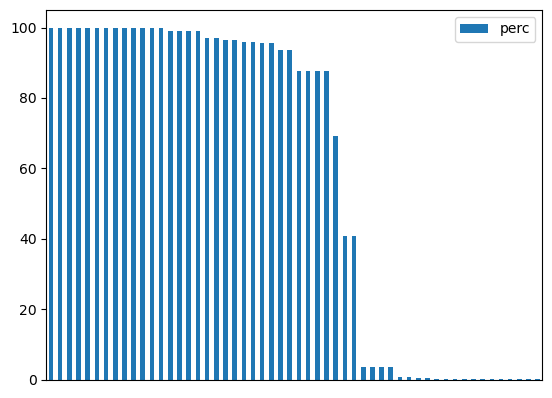

In [58]:
from log_stats import count_cases_per_event

activ_cases_counts = count_cases_per_event('concept:name', 'case:concept:name', log).reset_index()

# fullactiv_cases_counts = count_cases_per_event('activity_full_value', 'app_num', log).reset_index()
# activ_cases_counts = count_cases_per_event('activity', 'app_num', log).reset_index()

In [59]:
activ_cases_counts[activ_cases_counts['perc']<10]

,concept:name,cases,perc
34,Post Identity Checks [end],282,3.646237
35,Post Identity Checks [start],282,3.646237
36,Identity Verification [end],280,3.620378
37,Identity Verification [start],280,3.620378
38,Misrepresentation Activity [end],60,0.775795
39,Misrepresentation Activity [start],60,0.775795
40,Candidate Name Search [end],27,0.349108
41,Candidate Name Search [start],27,0.349108
42,Security Activity [end],20,0.258598
43,Security Activity [start],20,0.258598


In [ ]:
# let's filter on activity + status pairs that occur in 10% or less of cases
to_drop = activ_cases_counts.loc[activ_cases_counts['perc']<10, 'concept:name']
log_filter = log[~ log['concept:name'].isin(to_drop)]

# to_drop = activ_cases_counts.loc[activ_cases_counts['perc']<10, 'activity_full_value']
# log = log[~ log['activity_full_value'].isin(to_drop)]

246626 245245


In [63]:
# original variant situation
var_stats = get_variants_stats(log)
var_stats

,sequence,cov_amt,cov_perc,cov_perc_cumul,var_perc_cumul
0,"(Application Status [start], Eligibility Asses...",43,0.555987,0.555987,0.019436
1,"(Application Status [start], Eligibility Asses...",36,0.465477,1.021464,0.038873
2,"(Application Status [start], Eligibility Asses...",33,0.426687,1.448151,0.058309
3,"(Application Status [start], Eligibility Asses...",33,0.426687,1.874838,0.077745
4,"(Application Status [start], Eligibility Asses...",27,0.349108,2.223946,0.097182
...,...,...,...,...,...
5140,"(Application Status [start], Eligibility Asses...",1,0.012930,99.948280,99.922255
5141,"(Application Status [start], Eligibility Asses...",1,0.012930,99.961210,99.941691
5142,"(Application Status [start], Eligibility Asses...",1,0.012930,99.974140,99.961127
5143,"(Application Status [start], Eligibility Asses...",1,0.012930,99.987070,99.980564


In [61]:
from variant_stats import get_variants_stats, get_variant_coverage, get_covering_variants, filter_traces_on_variants

# what does this do to our variants?
var_stats = get_variants_stats(log_filter)
var_stats

,sequence,cov_amt,cov_perc,cov_perc_cumul,var_perc_cumul
0,"(Application Status [start], Eligibility Asses...",43,0.555987,0.555987,0.019681
1,"(Application Status [start], Eligibility Asses...",36,0.465477,1.021464,0.039362
2,"(Application Status [start], Eligibility Asses...",33,0.426687,1.448151,0.059043
3,"(Application Status [start], Eligibility Asses...",33,0.426687,1.874838,0.078725
4,"(Application Status [start], Eligibility Asses...",27,0.349108,2.223946,0.098406
...,...,...,...,...,...
5076,"(Application Status [start], Eligibility Asses...",1,0.012930,99.948280,99.921275
5077,"(Application Status [start], Eligibility Asses...",1,0.012930,99.961210,99.940957
5078,"(Application Status [start], Eligibility Asses...",1,0.012930,99.974140,99.960638
5079,"(Application Status [start], Eligibility Asses...",1,0.012930,99.987070,99.980319


## Delete duplicate events

## Remove infrequent variants

In [43]:
import pandas as pd
from variant_stats import get_variants_stats, get_variant_coverage, get_covering_variants, filter_traces_on_variants

In [44]:
abstr_log = pd.read_csv("data/combined_event_log-abstracted2.csv")
abstr_log

,case:concept:name,Parent Item,activity,index,time:timestamp,act_upd_by,activity_id,group,activity_status,cor,citz,activity_full_value,concept:name,Activity
0,0,NaN,Application Status,0,2024-06-03 09:20:37.327,0,1-SQ1RI5F,NaN,Prospective,Vietnam,Vietnam,Application Status - Prospective,Application Status [start],NaN
1,0,NaN,Eligibility Assessment,2,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Eligibility Assessment - NIL,Eligibility Assessment [start],NaN
2,0,NaN,Final Assessment,3,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Final Assessment - NIL,Final Assessment [start],NaN
3,0,NaN,Misrepresentation,1,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Misrepresentation - NIL,Misrepresentation [start],NaN
4,0,NaN,Misrepresentation,1,2024-06-03 09:20:37.327,1,0,NaN,NIL,Vietnam,Vietnam,Misrepresentation - NIL,Misrepresentation [end],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246621,7733,Other Req Assessment,Verification,543297,2024-06-17 07:46:39.197,9,1-STCSFDC,NaN,Completed,Belgium,Cameroon,Verification - Completed,Other Req Assessment [end],Verification
246622,7733,NaN,Other Reqs Assessment,543298,2024-06-17 07:46:39.433,281,1-STC2A6X,NaN,NIL,Belgium,Cameroon,Other Reqs Assessment - NIL,Other Reqs Assessment [end],NaN
246623,7733,NaN,Eligibility Assessment,543300,2024-06-28 10:45:09.050,281,1-STC2A6X,NaN,Failed,Belgium,Cameroon,Eligibility Assessment - Failed,Eligibility Assessment [end],NaN
246624,7733,NaN,Final Assessment,543301,2024-06-28 10:45:09.587,281,1-STC2A6X,NaN,Refused,Belgium,Cameroon,Final Assessment - Refused,Final Assessment [end],NaN


In [45]:
var_stats = get_variants_stats(abstr_log)
var_stats

,sequence,cov_amt,cov_perc,cov_perc_cumul,var_perc_cumul
0,"(Application Status [start], Eligibility Asses...",43,0.555987,0.555987,0.019436
1,"(Application Status [start], Eligibility Asses...",36,0.465477,1.021464,0.038873
2,"(Application Status [start], Eligibility Asses...",33,0.426687,1.448151,0.058309
3,"(Application Status [start], Eligibility Asses...",33,0.426687,1.874838,0.077745
4,"(Application Status [start], Eligibility Asses...",27,0.349108,2.223946,0.097182
...,...,...,...,...,...
5140,"(Application Status [start], Eligibility Asses...",1,0.012930,99.948280,99.922255
5141,"(Application Status [start], Eligibility Asses...",1,0.012930,99.961210,99.941691
5142,"(Application Status [start], Eligibility Asses...",1,0.012930,99.974140,99.961127
5143,"(Application Status [start], Eligibility Asses...",1,0.012930,99.987070,99.980564


In [ ]:
len(abstr_log['case:concept:name'].unique())

# still 7734 traces vs. 5145 variants!

7734